### Image Stacking

we perform image stacking to stack multiple images of the samples to reduce signal-to-noise-ratio (SNR). 
Ideas came from this [blog](https://pythonmana.com/2021/12/20211208035410143h.html).

In [1]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image
from pylab import figure, cm

import os
import sys  
sys.path.insert(0, '../dip_utils')

from matrix_utils import arr_info
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_pair)
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import colors
from matplotlib.colors import LogNorm

In [2]:
def blend_stack(I):
    blend = np.mean(I, axis=0)
    return blend.astype(I.dtype)

In [3]:
def stackRead(path):
    img_lib = glob.glob(path)
    n = len(img_lib)
    sample = plt.imread(img_lib[0])
    y, x, c = sample.shape
    stack = np.zeros((n,y,x,c), dtype=sample.dtype)
    for file in img_lib:
        index = img_lib.index(file)
        image = plt.imread(file)
        stack[index] = image
    return stack

In [4]:
def image_stacking(path, dest):
    stack_list = []
    filename = []
    for dic in os.listdir(path):
        if dic != '.ipynb_checkpoints':
            filename.append(dic)
    for dic in os.listdir(path):
        d = os.path.join(path, dic)  # directory of water samples
        if not d.endswith('.ipynb_checkpoints'):
            stack = stackRead(os.path.join(d, '*.jpg'))
            stack_list.append(stack)
    for i in range(len(stack_list)):
        mean = blend_stack(stack_list[i])
        I = Image.fromarray(mean)
        #I.save("../%s/%s.jpg" % (dest, filename[i]))
        I.save("%s/%s.jpg" % (dest, filename[i]))

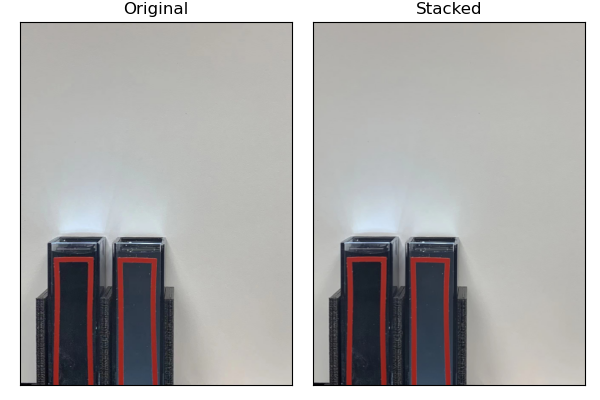

In [5]:
# I = plt.imread('../sampled_images/NTU129/NTU129a.jpg')
# J = plt.imread('../stacked_new/NTU129.jpg')
# vis_pair(I, J)

In [6]:
# arr_info(I)

((1702, 1276, 3), dtype('uint8'), 0, 255)

In [7]:
# Ilog = (32*np.log2(I + 1)).astype('uint8')
# arr_info(Ilog)

<ipython-input-7-45a9963db813>:1: RuntimeWarning: divide by zero encountered in log2
  Ilog = (32*np.log2(I + 1)).astype('uint8')


((1702, 1276, 3), dtype('uint8'), 0, 255)

In [8]:
# Jlog = (32*np.log2(J + 1)).astype('uint8')

<ipython-input-8-6013488e5781>:1: RuntimeWarning: divide by zero encountered in log2
  Jlog = (32*np.log2(J + 1)).astype('uint8')


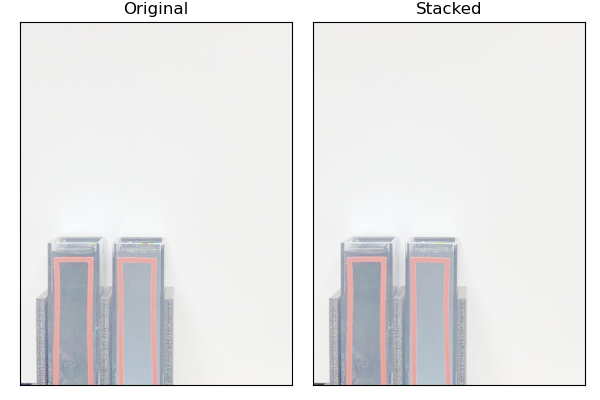

In [9]:
# vis_pair(Ilog, Jlog)
# #120*114

In [12]:
# plt.savefig('../assets/stacked_log.pdf', dpi=600)

In [ ]:
# x1 = 195
# x2 = 315
# y1 = 1543
# y2 = 1663

In [ ]:
# f = figure(figsize=(6.2, 5.6))
# ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
# axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])

# im = ax.matshow(I, cmap=cm.gray_r, norm=LogNorm(vmin=0.01, vmax=1))

# t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
# f.colorbar(im, cax=axcolor, ticks=t, format="$%.2f$")

# f.show()

In [ ]:
# f = figure(figsize=(6.2, 5.6))
# ax = f.add_axes([0.17, 0.02, 0.72, 0.79])
# axcolor = f.add_axes([0.90, 0.02, 0.03, 0.79])

# im = ax.matshow(J, cmap=cm.gray_r, norm=LogNorm(vmin=0.01, vmax=1))

# t = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
# f.colorbar(im, cax=axcolor, ticks=t, format="$%.2f$")

# f.show()

In [ ]:
# f, ax = plt.subplots(1,2,figsize=(8,4), sharex=True, sharey=True)
# ax[0].imshow(I)
# ax[0].set_title('Original Image')
# ax[1].imshow(J) # black to red colormap
# ax[1].set_title('Stacked Image')
# axinsl = zoomed_inset_axes(ax[0], 6.5, loc=1) # zoom = 2
# axinsl.imshow(I)
# axinsl.set_xlim(x1, x2)
# axinsl.set_ylim(y2, y1)
# mark_inset(ax[0], axinsl, loc1=2, loc2=4, fc="none", ec="0.5")
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# axinsr = zoomed_inset_axes(ax[1], 6.5, loc=1) # zoom = 2
# axinsr.imshow(J)
# axinsr.set_xlim(x1, x2)
# axinsr.set_ylim(y2, y1)
# mark_inset(ax[1], axinsr, loc1=2, loc2=4, fc="none", ec="0.5")
# ax[0].tick_params(
#     axis='both',         
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False) 
# ax[1].tick_params(
#     axis='both',         
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False) 
# [a.axes.get_xaxis().set_visible(False) for a in ax];
# [a.axes.get_yaxis().set_visible(False) for a in ax];
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.draw()
# plt.show()

In [ ]:
# plt.savefig('../assets/stacked.pdf', dpi=600)

In [ ]:
# x1 = 506
# x2 = 606
# y1 = 1060
# y2 = 1160

In [ ]:
# f, ax = plt.subplots(1,1,figsize=(6,5), sharex=True, sharey=True)
# ax.imshow(I)
# axinsl = zoomed_inset_axes(ax, 4, loc=1) # zoom = 2
# axinsl.imshow(I)
# axinsl.set_xlim(x1, x2)
# axinsl.set_ylim(y2, y1)
# mark_inset(ax, axinsl, loc1=2, loc2=4, fc="none", ec="0.5")
# ax.tick_params(
#     axis='both',         
#     which='both',      
#     bottom=False,      
#     top=False,         
#     labelbottom=False) 
# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# plt.draw()
# plt.show()